In [1]:
%load_ext autoreload
%autoreload 2

import multiprocessing as mp
import torch
import wandb_util.wandb_util as wbu

torch.set_grad_enabled(False)
mp.set_start_method("spawn", force=True)

In [16]:
from omegaconf import OmegaConf
from scripts.wandb_experiments.texgen_vs_gr_experiment import TexGenVsGrExperimentConfig, texgen_vs_gr_experiment

config = TexGenVsGrExperimentConfig(
    texgen_prompt="Deadpool",
    gr_prompt="Deadpool, blank background",
    anim_tag='backside:latest',
    texturing_tag='human_mv:latest',
    seed=0
)
config = OmegaConf.structured(config)

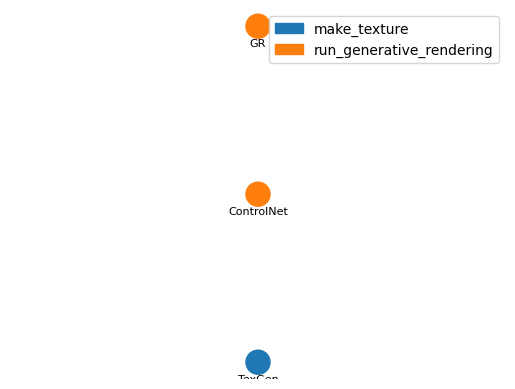

In [17]:
spec = texgen_vs_gr_experiment(config)

wbu.visualize_spec(spec)

In [18]:
wbu.sync_experiment(texgen_vs_gr_experiment, config, "deadpool_behind")

Experiment: https://wandb.ai/romeu/diffusion-3D-features/groups/deadpool_behind/workspace

Would execute 3 new runs:
- GR
- ControlNet
- TexGen

Would delete 5 outdated runs:
- ControlNet                     (uaouezyr)
- make_texture                   (9f4vphox)
- TexGen                         (b09dxw16)
- TexGen_anim                    (907p97oa)
- GR                             (mi69acro)

Do you want to continue? (y/n)
Deleting 5 runs
Executing 3 runs


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: romeu. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.3
wandb: Run data is saved locally in /home/jorge/thesis/wandb/run-20250424_202242-63ioyw29
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run GR
wandb: ⭐️ View project at https://wandb.ai/romeu/diffusion-3D-features
wandb: 🚀 View run at https://wandb.ai/romeu/diffusion-3D-features/runs/63ioyw29
wandb:   4 of 4 files downloaded.  
100%|██████████| 15/15 [00:25<00:00,  1.69s/it]


Moviepy - Building video /tmp/tmpuicphi2l.mp4.
Moviepy - Writing video /tmp/tmpuicphi2l.mp4

Moviepy - Done !
Moviepy - video ready /tmp/tmpuicphi2l.mp4


wandb: Adding directory to artifact (/tmp/local_artifacts/video/video)... Done. 0.0s
wandb:                                                                                
wandb: 
wandb: Run summary:
wandb: hash ec87d5a30967f4e1095f...
wandb: 
wandb: 🚀 View run GR at: https://wandb.ai/romeu/diffusion-3D-features/runs/63ioyw29
wandb: ⭐️ View project at: https://wandb.ai/romeu/diffusion-3D-features
wandb: Synced 5 W&B file(s), 0 media file(s), 8 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20250424_202242-63ioyw29/logs
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: romeu. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.3
wandb: Run data is saved locally in /home/jorge/thesis/wandb/run-20250424_202325-cbjwmkve
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run ControlNet
wandb: ⭐️ View project at https://wandb.ai/ro

Moviepy - Building video /tmp/tmp6p51k7ud.mp4.
Moviepy - Writing video /tmp/tmp6p51k7ud.mp4



Moviepy - Done !
Moviepy - video ready /tmp/tmp6p51k7ud.mp4


wandb: Adding directory to artifact (/tmp/local_artifacts/video/video)... Done. 0.0s
wandb:                                                                                
wandb: 
wandb: Run summary:
wandb: hash 12a71d031e5f01b363ab...
wandb: 
wandb: 🚀 View run ControlNet at: https://wandb.ai/romeu/diffusion-3D-features/runs/cbjwmkve
wandb: ⭐️ View project at: https://wandb.ai/romeu/diffusion-3D-features
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 1 other file(s)
wandb: Find logs at: ./wandb/run-20250424_202325-cbjwmkve/logs
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: romeu. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.3
wandb: Run data is saved locally in /home/jorge/thesis/wandb/run-20250424_202349-xwiz4ieb
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run TexGen
wandb: ⭐️ View project at https://wandb.a

Moviepy - Building video /tmp/tmpr6rzkvzm.mp4.
Moviepy - Writing video /tmp/tmpr6rzkvzm.mp4

Moviepy - Done !
Moviepy - video ready /tmp/tmpr6rzkvzm.mp4


wandb: Adding directory to artifact (/tmp/local_artifacts/rgb_texture/texture_views)... Done. 0.1s
Traceback (most recent call last):
  File "/home/jorge/thesis/wandb_util/wandb_util.py", line 391, in wrapper
    result = func(cfg, run_config, *args, **kwargs)
  File "/home/jorge/thesis/scripts/wandb_runs/make_texture.py", line 88, in make_texture
    texture_art.log()
  File "/home/jorge/thesis/wandb_util/wandb_util.py", line 292, in log
    wandb.log_artifact(self.wandb_artifact, aliases)
  File "/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 403, in wrapper_fn
    return func(self, *args, **kwargs)
  File "/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 393, in wrapper
    return func(self, *args, **kwargs)
  File "/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 3127, in log_artifact
    return self._log_artifact(
  File "/home/jorge/miniconda3/e

In [4]:
from scripts.wandb_experiments.texgen_vs_gr_experiment import get_exp_data

data = get_exp_data("ymca_stormtrooper")

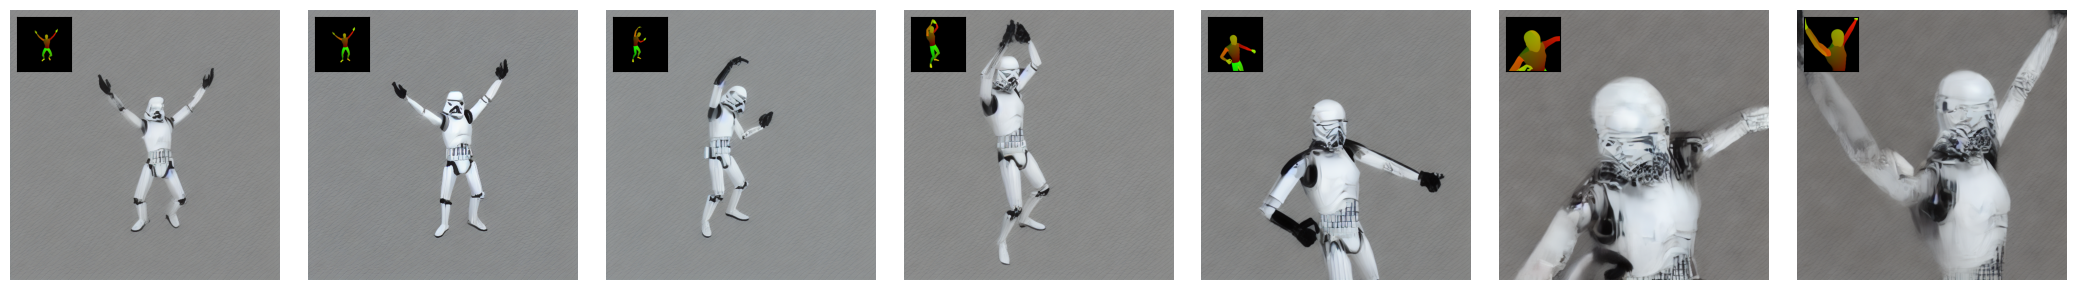

In [15]:
from matplotlib import pyplot as plt
from matplotlib.transforms import Bbox
from text3d2video.util import ordered_sample_indices
from text3d2video.utilities.ipython_utils import display_ims
from text3d2video.utilities.matplotlib_utils import add_inset

frame_indices = ordered_sample_indices(data.gr_frames, 7)
gr_frames = [data.gr_frames[i] for i in frame_indices]
uvs = [data.uvs[i] for i in frame_indices]

fig, axs = display_ims(gr_frames, show=False)

for i, ax in enumerate(axs):
    box = Bbox.from_bounds(220, 100, 100, 100)
    ax = add_inset(ax, loc="upper left", width="20%")
    ax.imshow(uvs[i])
    # add_zoom_inset(ax, box)

plt.savefig("outs/camera_z_movement_stormtrooper.pdf", dpi=300, bbox_inches="tight")

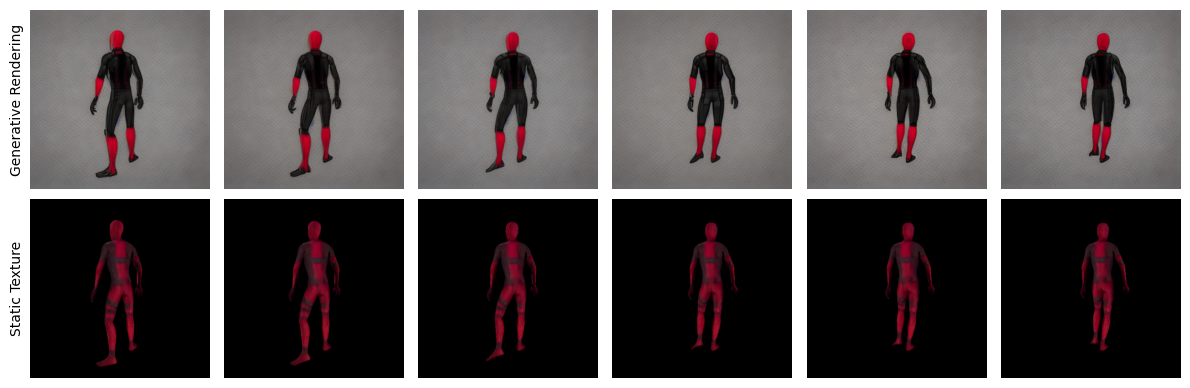

In [8]:
from matplotlib.transforms import Bbox
from text3d2video.util import ordered_sample_indices
from text3d2video.utilities.ipython_utils import display_ims_grid

frame_indices = ordered_sample_indices(data.gr_frames, 6)
gr_frames = [data.gr_frames[i] for i in frame_indices]
renders = [data.renders[i] for i in frame_indices]

fig, axs = display_ims_grid(
    [gr_frames, renders],
    row_titles=["Generative Rendering", "Static Texture"],
    show=False,
    scale=2
)

zoom_box = Bbox.from_bounds(210, 70, 100, 100)

# for ax in axs[0]:
#     add_zoom_inset(ax, zoom_box)

# for ax in axs[1]:
#     add_zoom_inset(ax, zoom_box)

fig.savefig("metalic_cat.pdf", dpi=300, bbox_inches="tight")

In [9]:
from scripts.wandb_experiments.texgen_vs_gr_experiment import comparison_vid
from text3d2video.utilities.ipython_utils import display_vid

display_vid(comparison_vid(data), width=1000)

TypeError: display_vid() got an unexpected keyword argument 'width'